# Squared Error Loss
This exercise is to use a simple and dumb architecture of 2-layer network with squared error loss to classify iris species. I am not going to use ReLU for this network, just want to see if sigmoid can pull it off on this small data set.

1. Multiply first set of weight with input vector and produce $\theta_{1}$
2. Activate through sigmoid function and produce $\vec{a}$
3. Multiply second set of weight with the activation vector and produce  $\theta_{2}$
4. Activate through sigmoid again and produce $\hat{y}$

## Gradients

### Loss Definition

With $\hat{y}$ being our prediction vector and $y$ being the expected classification, the mean squared error loss is written as follows:

$$
L = \frac{1}{N} \sum (\hat{y}_{i} - y_{i})^{2}
$$

### Backprops
Derivative of our prediction vector with respect to loss

$$
\frac{\partial L}{\partial \hat{y}} = 2 \cdot (\hat{y} - y)
$$

Derivative of $\theta_{2}$ with respect to $\hat{y}$

$$
\frac{\partial \hat{y}}{\partial \theta_2} = (1 - \hat{y}) \cdot \hat{y}
$$

Derivatve of second weight and a with respect to $\theta_{2}$ 

$$
\frac{\partial \theta_{2}}{\partial W_{2}} = a \quad \frac{\partial \theta_{2}}{\partial a} = W_{2}
$$

Derivative of $\theta_{1}$ with respect to a

$$
\frac{\partial a}{\partial \theta_1} = (1 - a) \cdot a
$$

Derivative of x and $W_{1}$ with respect to $\theta_{1}$

$$
\frac{\partial \theta_{1}}{\partial W_{1}} = x \quad \frac{\partial \theta_{2}}{\partial x} = W_{1}
$$

Therefore, 

$$
\frac{L}{\partial W_{2}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta_2} \cdot \frac{\partial \theta_{2}}{\partial W_{2}}
$$

And,

$$
\frac{L}{\partial W_{1}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta_2} \cdot \frac{\partial \theta_{2}}{\partial a} \cdot \frac{\partial a}{\partial \theta_1} \cdot \frac{\partial \theta_{1}}{\partial W_{1}}
$$


## Classifications
There are three classes of iris species and they are labeled as class 0, class 1 and class 2. The inputs are vector of 4th dimension i.e. sepal width, sepal length, petal width, and petal length. I represent the output vector as 

```
class-0: [1, 0, 0]
class-1: [0, 1, 0]
class-2: [0, 0, 1]
```

Test accuracy before training: 0.333333333333
Test accuracy after training: 1.0


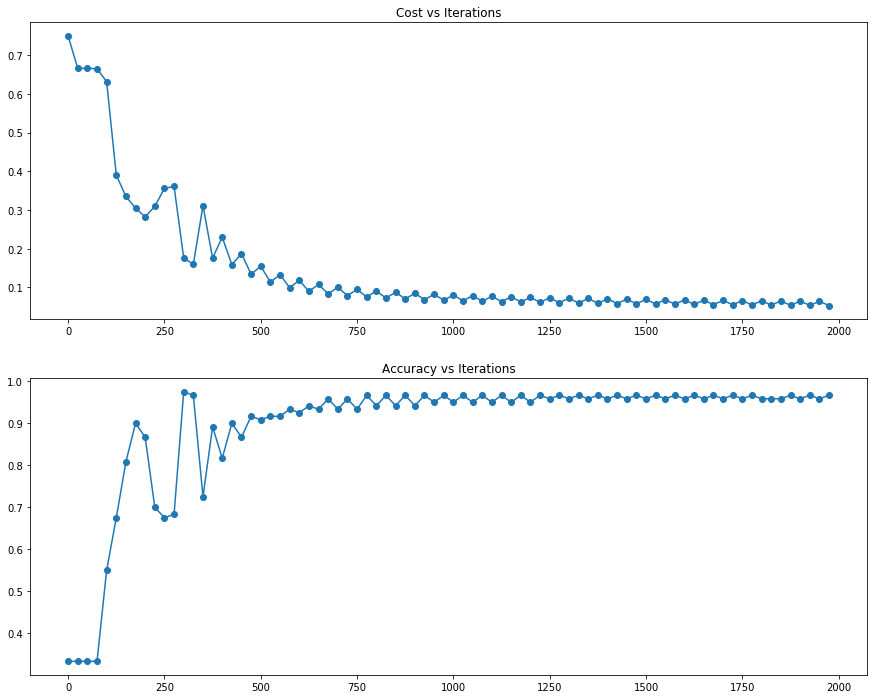

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
from demo_net.sq_error_loss_net import SquaredErrorLossNetwork
from demo_net.data_util import load_iris_data
from matplotlib import pyplot

# Load the data
xtr, ytr = load_iris_data('../datasets/iris_train.csv')
xte, yte = load_iris_data('../datasets/iris_test.csv')

input_dim, hidden_dim, output_dim = xtr.shape[1], 5, ytr.shape[1]

# Instantiate my neural network
network = SquaredErrorLossNetwork(input_dim, hidden_dim, output_dim)

# Train it!
test_acc = (network.predict(xte) == np.argmax(yte, axis=1)).mean()
print 'Test accuracy before training: %s' % str(test_acc)

iters, loss_hist, acc_hist = network.train(xtr, ytr)

test_acc = (network.predict(xte) == np.argmax(yte, axis=1)).mean()
print 'Test accuracy after training: %s' % str(test_acc)

# Let's plot it
matplotlib.rcParams['figure.figsize'] = (15,12)

pyplot.subplot(2, 1, 1)
pyplot.plot(iters, loss_hist, '-o')
pyplot.title('Cost vs Iterations')

pyplot.subplot(2, 1, 2)
pyplot.plot(iters, acc_hist, '-o')
pyplot.title('Accuracy vs Iterations')

pyplot.show()

## Results
Actually that work out pretty damn well, with 100% classification accuracy. However, it could be because my data set is small. I've only got 120 training examples and 30 test examples.